# Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
print('(rows,cols) :',df.shape)

(rows,cols) : (3276, 10)


In [4]:
df['Potability'].unique()

array([0, 1], dtype=int64)

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

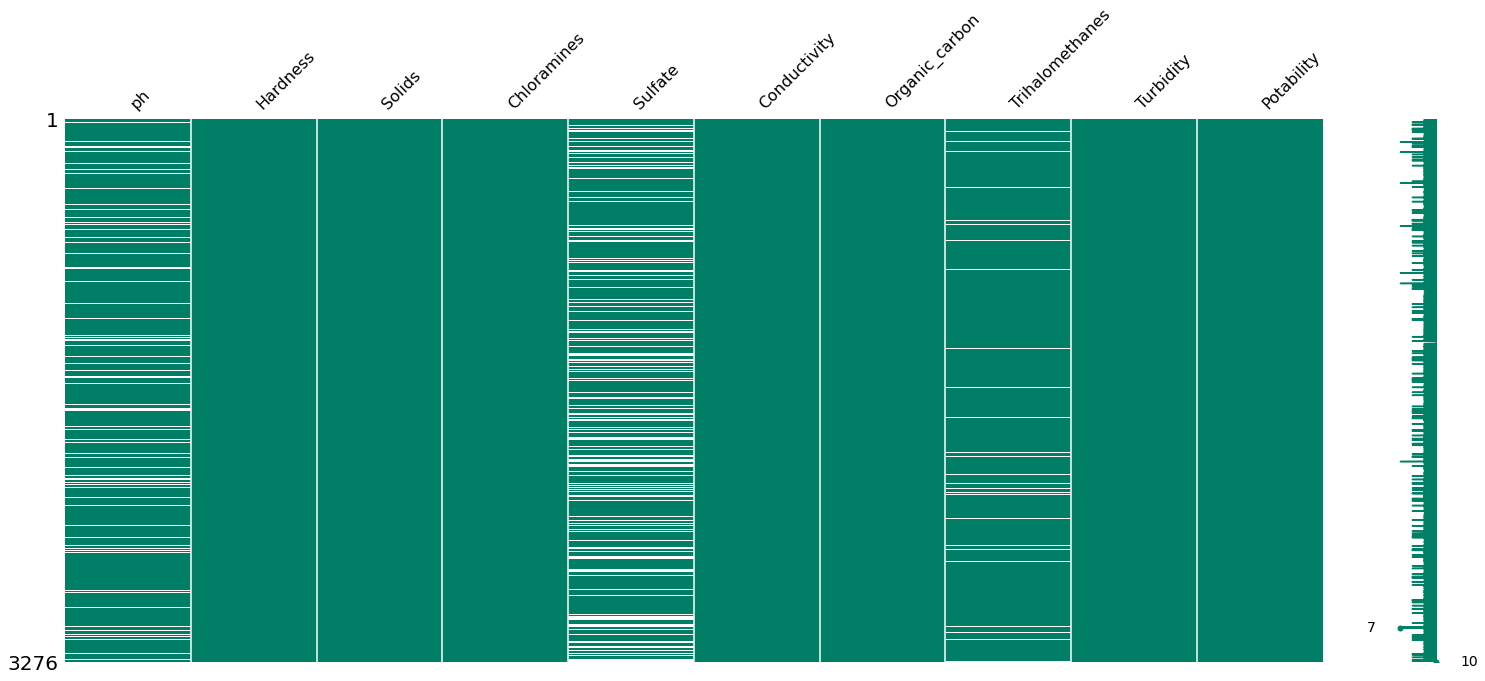

In [6]:
msno.matrix(df,color=(0,0.5,0.4))
plt.show()

In [7]:
missing_col=['ph','Sulfate','Trihalomethanes']
all_col=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [10]:
for col in missing_col:
    df[col].fillna(df[col].median(),inplace=True)

In [11]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
dfv=df.drop(columns='Potability')

In [13]:
dfv.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000


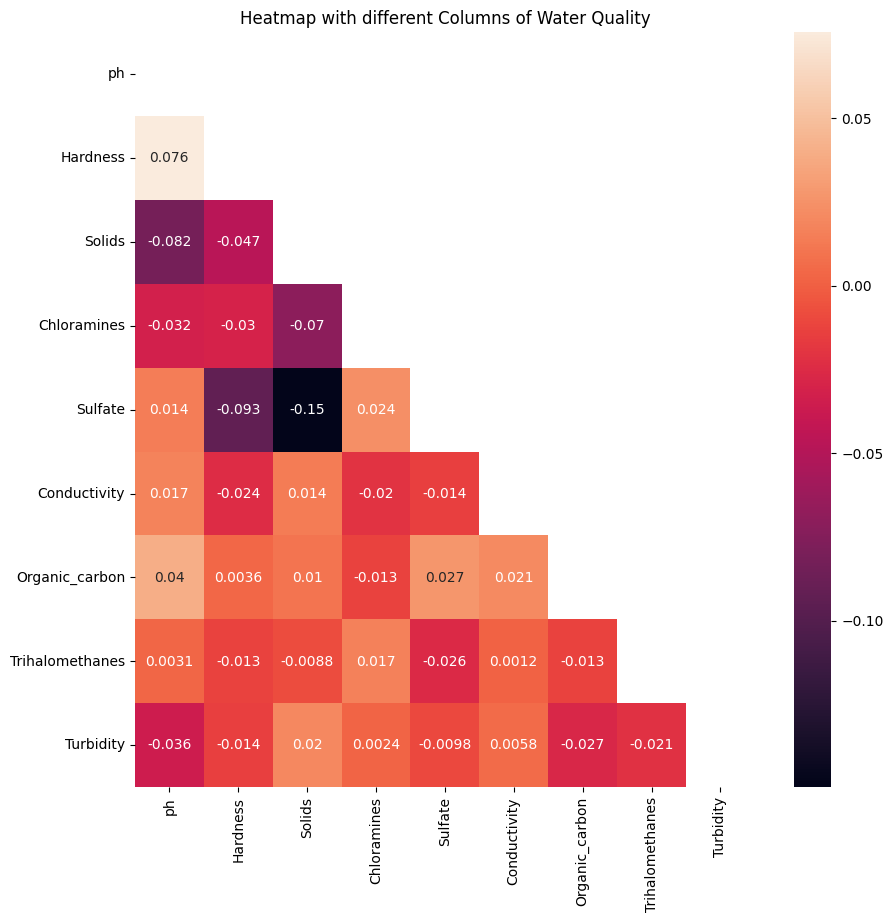

In [14]:
plt.figure(figsize=(10,10),dpi=100)
mat = np.triu(dfv.corr())
sns.heatmap(dfv.corr(),cmap="rocket",annot=True,mask=mat)
plt.title("Heatmap with different Columns of Water Quality")

plt.show()

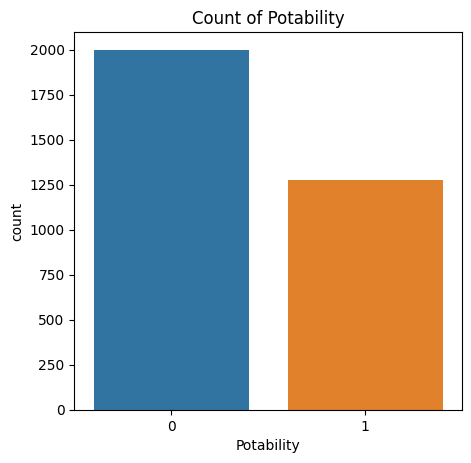

In [15]:
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(data=df,x='Potability')
plt.title('Count of Potability')
plt.show()

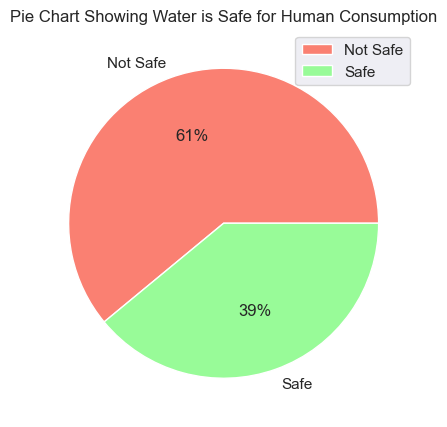

In [62]:
plt.figure(figsize=(5,10),dpi=100)
plt.pie(df['Potability'].value_counts(),labels=['Not Safe','Safe'],autopct='%1.0f%%',colors=['salmon','palegreen'])
plt.title('Pie Chart Showing Water is Safe for Human Consumption')
plt.legend()
plt.show()

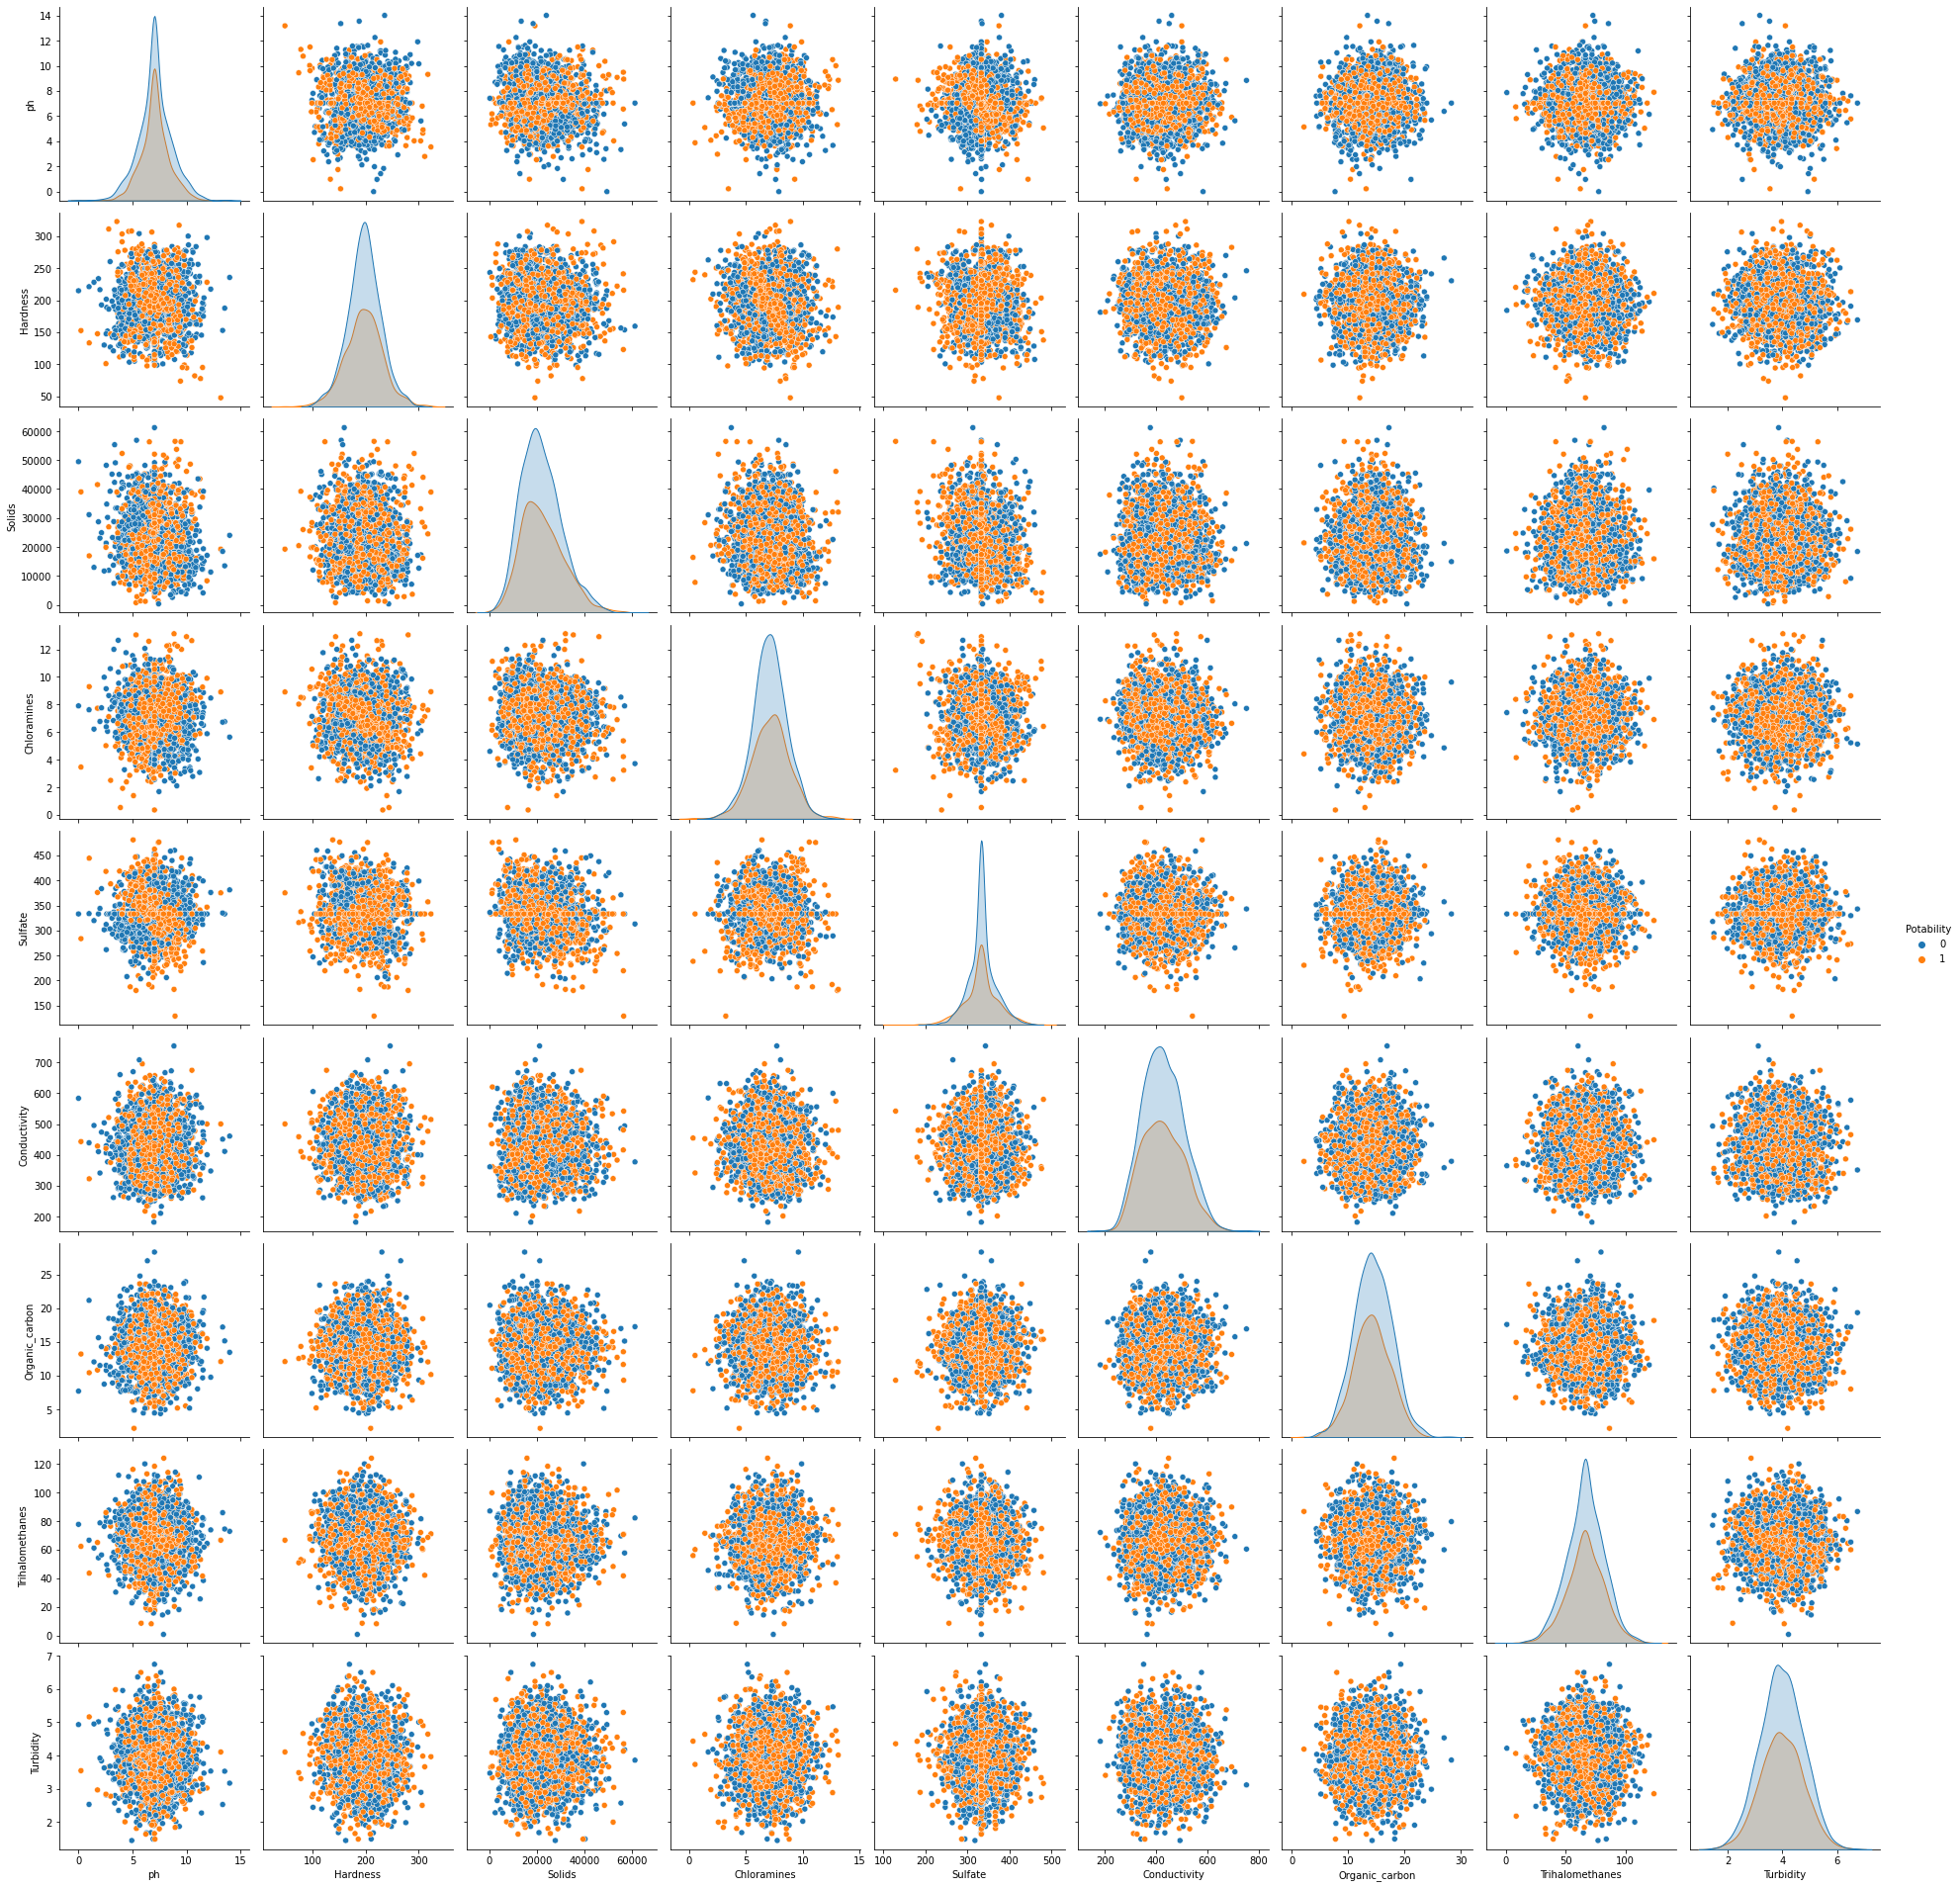

In [17]:
sns.pairplot(df,hue='Potability',size=3)
plt.show()

In [18]:
col=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

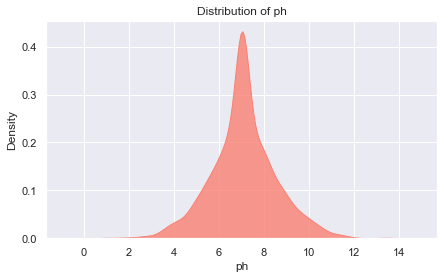

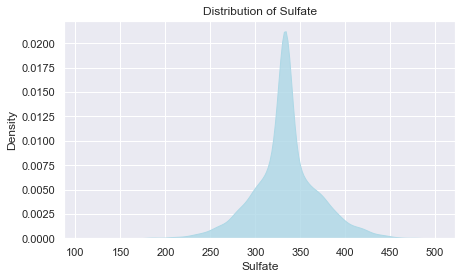

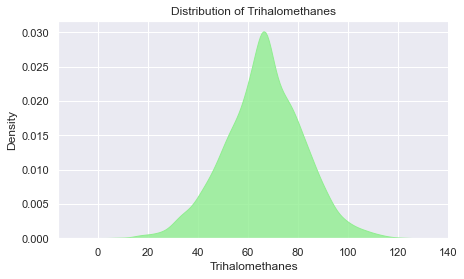

In [19]:
i=0
for col in missing_col:
    sns.set()
    fig,ax=plt.subplots(figsize=(7,4))
    sns.kdeplot(df[col],color=colors[i],alpha=0.8,fill=True,ax=ax)
    plt.title('Distribution of '+col)
    plt.grid(True)
    i+=1